In [500]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [501]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [124]:
!ls './drive/MyDrive/Maestría/AI'

Moody  Moody.csv  Poiseuille


In [509]:
#Data = pd.read_csv('./drive/MyDrive/Maestría/AI/Moody.csv', skiprows=1)
Data = np.loadtxt('./drive/MyDrive/Maestría/AI/Moody', skiprows=1)

In [513]:
Eps_D = Data[:,0]*100 #Datos de la rugosidad relativa
Re = Data[:,1]/100 #Número de reynolds para cada rugosidad
f = np.array(Data[:,2]) #Factor de fricción

In [453]:
Re[0]

40.0

In [504]:
input= Data[:, 0:2]
input[:,0] = input[:,0]*1000
input[:,1] = input[:,1]/1000

In [483]:
input[0]

array([50.,  4.])

In [514]:
x_train = input
y_train = f


In [637]:
model = keras.Sequential()
model.add(keras.Input(shape=2))
model.add(layers.Dense(25,activation='relu',use_bias=False))
model.add(layers.Dense(25,activation='tanh',use_bias=False))
model.add(layers.Dense(25,activation='tanh',use_bias=False))
model.add(layers.Dense(1,activation='tanh',use_bias=False))
model.compile(loss='MSE', optimizer=keras.optimizers.SGD(learning_rate=0.001))
model.summary()

Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_441 (Dense)           (None, 25)                50        
                                                                 
 dense_442 (Dense)           (None, 25)                625       
                                                                 
 dense_443 (Dense)           (None, 25)                625       
                                                                 
 dense_444 (Dense)           (None, 1)                 25        
                                                                 
Total params: 1,325
Trainable params: 1,325
Non-trainable params: 0
_________________________________________________________________


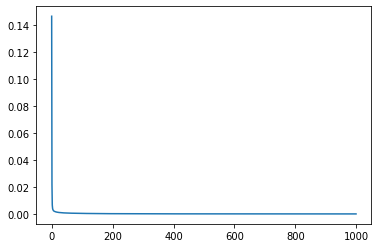

In [638]:
problem = model.fit(x_train, y_train,epochs=1000,verbose=False)
plt.plot(problem.history['loss'])

In [639]:
model.predict(x_train[0:20])


array([[0.06202189],
       [0.0831464 ],
       [0.09096205],
       [0.08839902],
       [0.07972652],
       [0.07286736],
       [0.07401836],
       [0.08016616],
       [0.06594755],
       [0.06184887],
       [0.04976252],
       [0.0940757 ],
       [0.08283826],
       [0.06551144],
       [0.068381  ],
       [0.07944521],
       [0.03141035],
       [0.03014075],
       [0.03014062],
       [0.03014062]], dtype=float32)

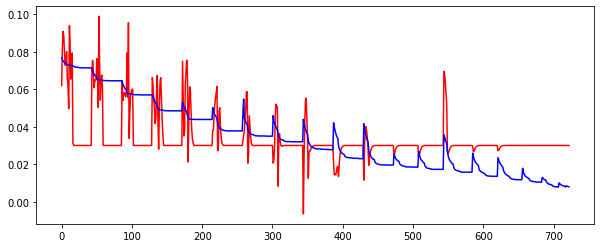

In [640]:
predict_f = model.predict(x_train[0:723])
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(predict_f, 'r')
ax.plot(y_train[0:723], 'b')